 Make more is a character level language model, meaning each sequence is treated as a series of characters. We'll be predicting the next character one by one.

In [6]:
words = open('names.txt', 'r').read().splitlines()

In [7]:
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [8]:
len(words)

32033

In [9]:
min(len(w) for w in words) # Smallest word

2

In [10]:
max(len(w) for w in words) # Largest word

15

Each character gives us a piece of statistical information about what characters are likely to have come after based on what's come before.

In [11]:
for w in words[:3]:
  for ch1, ch2 in zip(w, w[1:]):
    print(ch1, ch2)

e m
m m
m a
o l
l i
i v
v i
i a
a v
v a


In [12]:
# w = 'emma'. w[1:] = 'mma', so we zip emma and mma to get em, mm, ma , the last one is cut off.

In [13]:
for w in words[:3]:
  chs = ['<S>'] + list(w) + ['<E>']
  for ch1, ch2 in zip(chs, chs[1:]):
    print(ch1, ch2)

<S> e
e m
m m
m a
a <E>
<S> o
o l
l i
i v
v i
i a
a <E>
<S> a
a v
v a
a <E>


In [14]:
b = {}
for w in words:
  chs = ['<S>'] + list(w) + ['<E>']
  for ch1, ch2 in zip(chs, chs[1:]):
    bigram = (ch1, ch2)
    b[bigram] = b.get(bigram, 0) + 1

In [15]:
sorted(b.items(), key = lambda kv: -kv[1])

[(('n', '<E>'), 6763),
 (('a', '<E>'), 6640),
 (('a', 'n'), 5438),
 (('<S>', 'a'), 4410),
 (('e', '<E>'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('<S>', 'k'), 2963),
 (('l', 'e'), 2921),
 (('e', 'n'), 2675),
 (('l', 'a'), 2623),
 (('m', 'a'), 2590),
 (('<S>', 'm'), 2538),
 (('a', 'l'), 2528),
 (('i', '<E>'), 2489),
 (('l', 'i'), 2480),
 (('i', 'a'), 2445),
 (('<S>', 'j'), 2422),
 (('o', 'n'), 2411),
 (('h', '<E>'), 2409),
 (('r', 'a'), 2356),
 (('a', 'h'), 2332),
 (('h', 'a'), 2244),
 (('y', 'a'), 2143),
 (('i', 'n'), 2126),
 (('<S>', 's'), 2055),
 (('a', 'y'), 2050),
 (('y', '<E>'), 2007),
 (('e', 'r'), 1958),
 (('n', 'n'), 1906),
 (('y', 'n'), 1826),
 (('k', 'a'), 1731),
 (('n', 'i'), 1725),
 (('r', 'e'), 1697),
 (('<S>', 'd'), 1690),
 (('i', 'e'), 1653),
 (('a', 'i'), 1650),
 (('<S>', 'r'), 1639),
 (('a', 'm'), 1634),
 (('l', 'y'), 1588),
 (('<S>', 'l'), 1572),
 (('<S>', 'c'), 1542),
 (('<S>', 'e'), 1531),
 (('j', 'a'), 1473),
 (

In [16]:
#it'll be better to keep this information in a 2D array.
# we'll use pytorch tensors

In [17]:
import torch

In [18]:
a = torch.zeros((3,5), dtype = torch.int32) # float32 is the default, we'll change to int here

In [19]:
a

tensor([[0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0]], dtype=torch.int32)

In [20]:
a[1,3] = 1 # indexing into the array

In [21]:
a

tensor([[0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0]], dtype=torch.int32)

In [22]:
N = torch.zeros((28,28), dtype= torch.int32)

In [23]:
chars = sorted(list(set(''.join(words)))) # all 26 lower case characters

In [24]:
stoi = {s:i for i,s in enumerate(chars)}
stoi['<S>'] = 26
stoi['<E>'] = 27

In [25]:

for w in words:
  chs = ['<S>'] + list(w) + ['<E>']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    N[ix1, ix2] += 1

  # N is ugly

In [26]:
import matplotlib.pyplot as plt

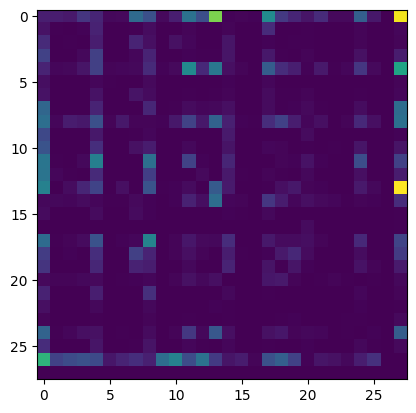

In [27]:
plt.imshow(N)

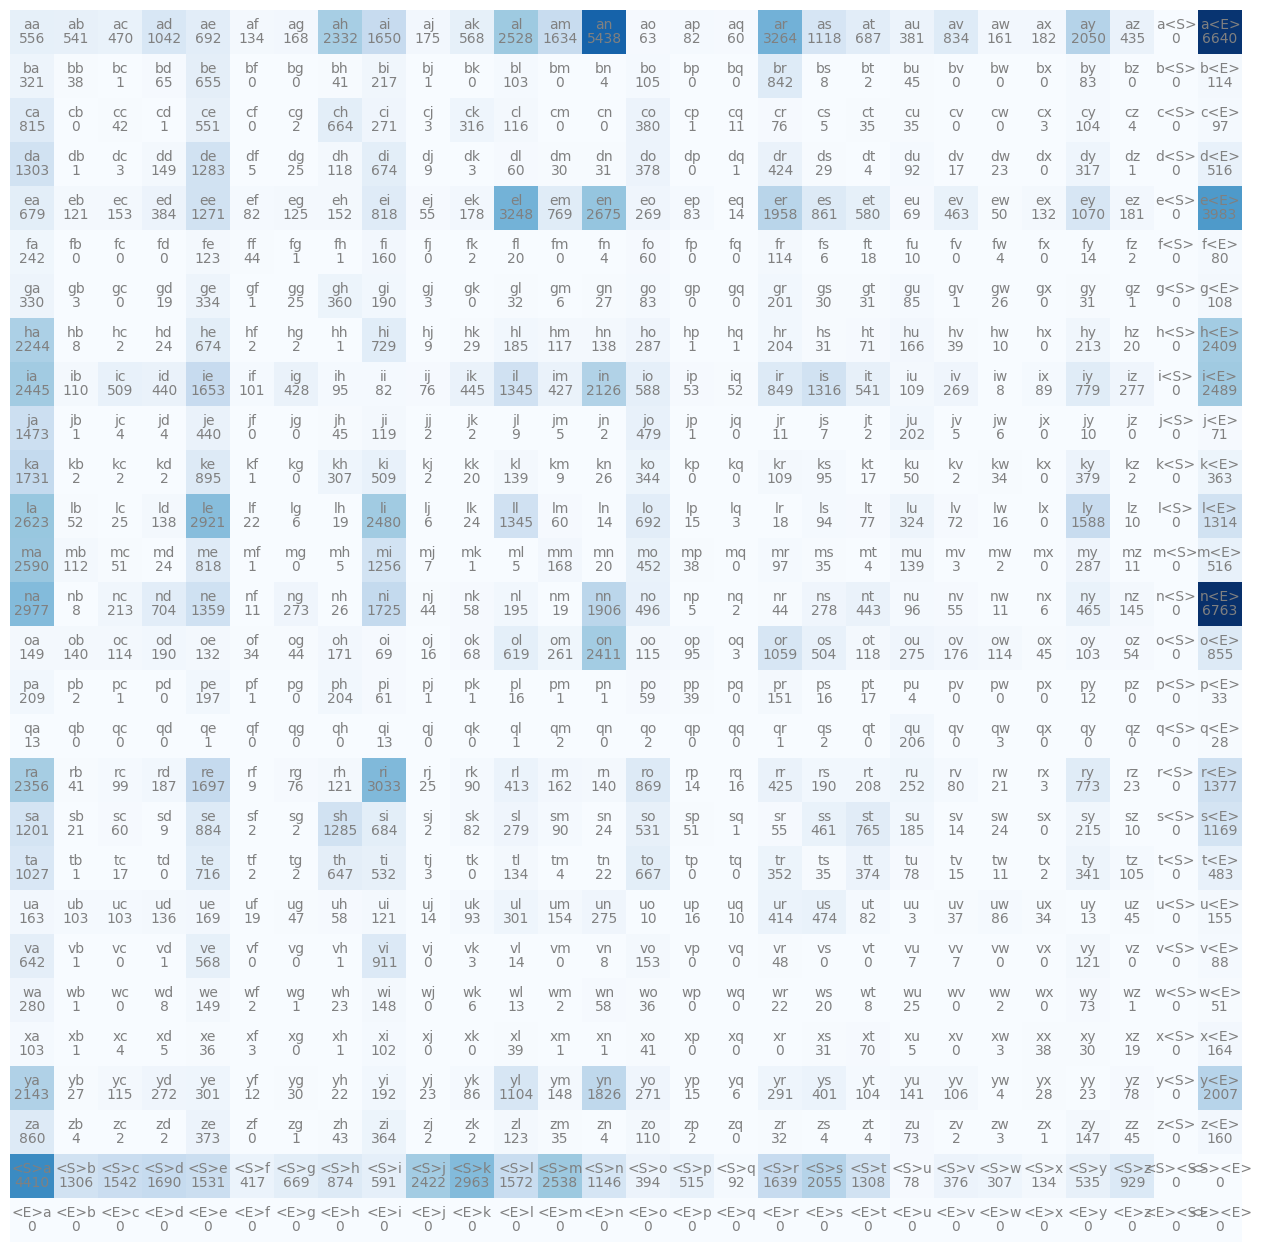

In [28]:
itos = {i:s for s,i in stoi.items()}

plt.figure(figsize = (16,16))
plt.imshow(N, cmap = 'Blues')
for i in range(28):
  for j in range(28):
    chstr = itos[i] + itos[j]
    plt.text(j, i, chstr, ha = 'center', va = 'bottom', color = 'gray')
    plt.text(j, i, N[i,j].item(), ha = 'center', va = 'top', color = 'gray')
plt.axis('off');

#note that the .item() is called because without it you'll return a
# torch tensor, not an int.

In [29]:
# not bottom row and right most col. It's zero because those chars
# don't work that way. So we're being silly.

In [30]:
#instead of two special characters there will be just one

In [31]:
N = torch.zeros((27, 27), dtype = torch.int32)

In [32]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0 # ourspecial character will start first
print(stoi)
itos = {i:s for s,i in sorted(stoi.items())}
print(itos)

{'a': 1, 'b': 2, 'c': 3, 'd': 4, 'e': 5, 'f': 6, 'g': 7, 'h': 8, 'i': 9, 'j': 10, 'k': 11, 'l': 12, 'm': 13, 'n': 14, 'o': 15, 'p': 16, 'q': 17, 'r': 18, 's': 19, 't': 20, 'u': 21, 'v': 22, 'w': 23, 'x': 24, 'y': 25, 'z': 26, '.': 0}
{0: '.', 1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z'}


In [33]:
for w in words:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    N[ix1, ix2] += 1


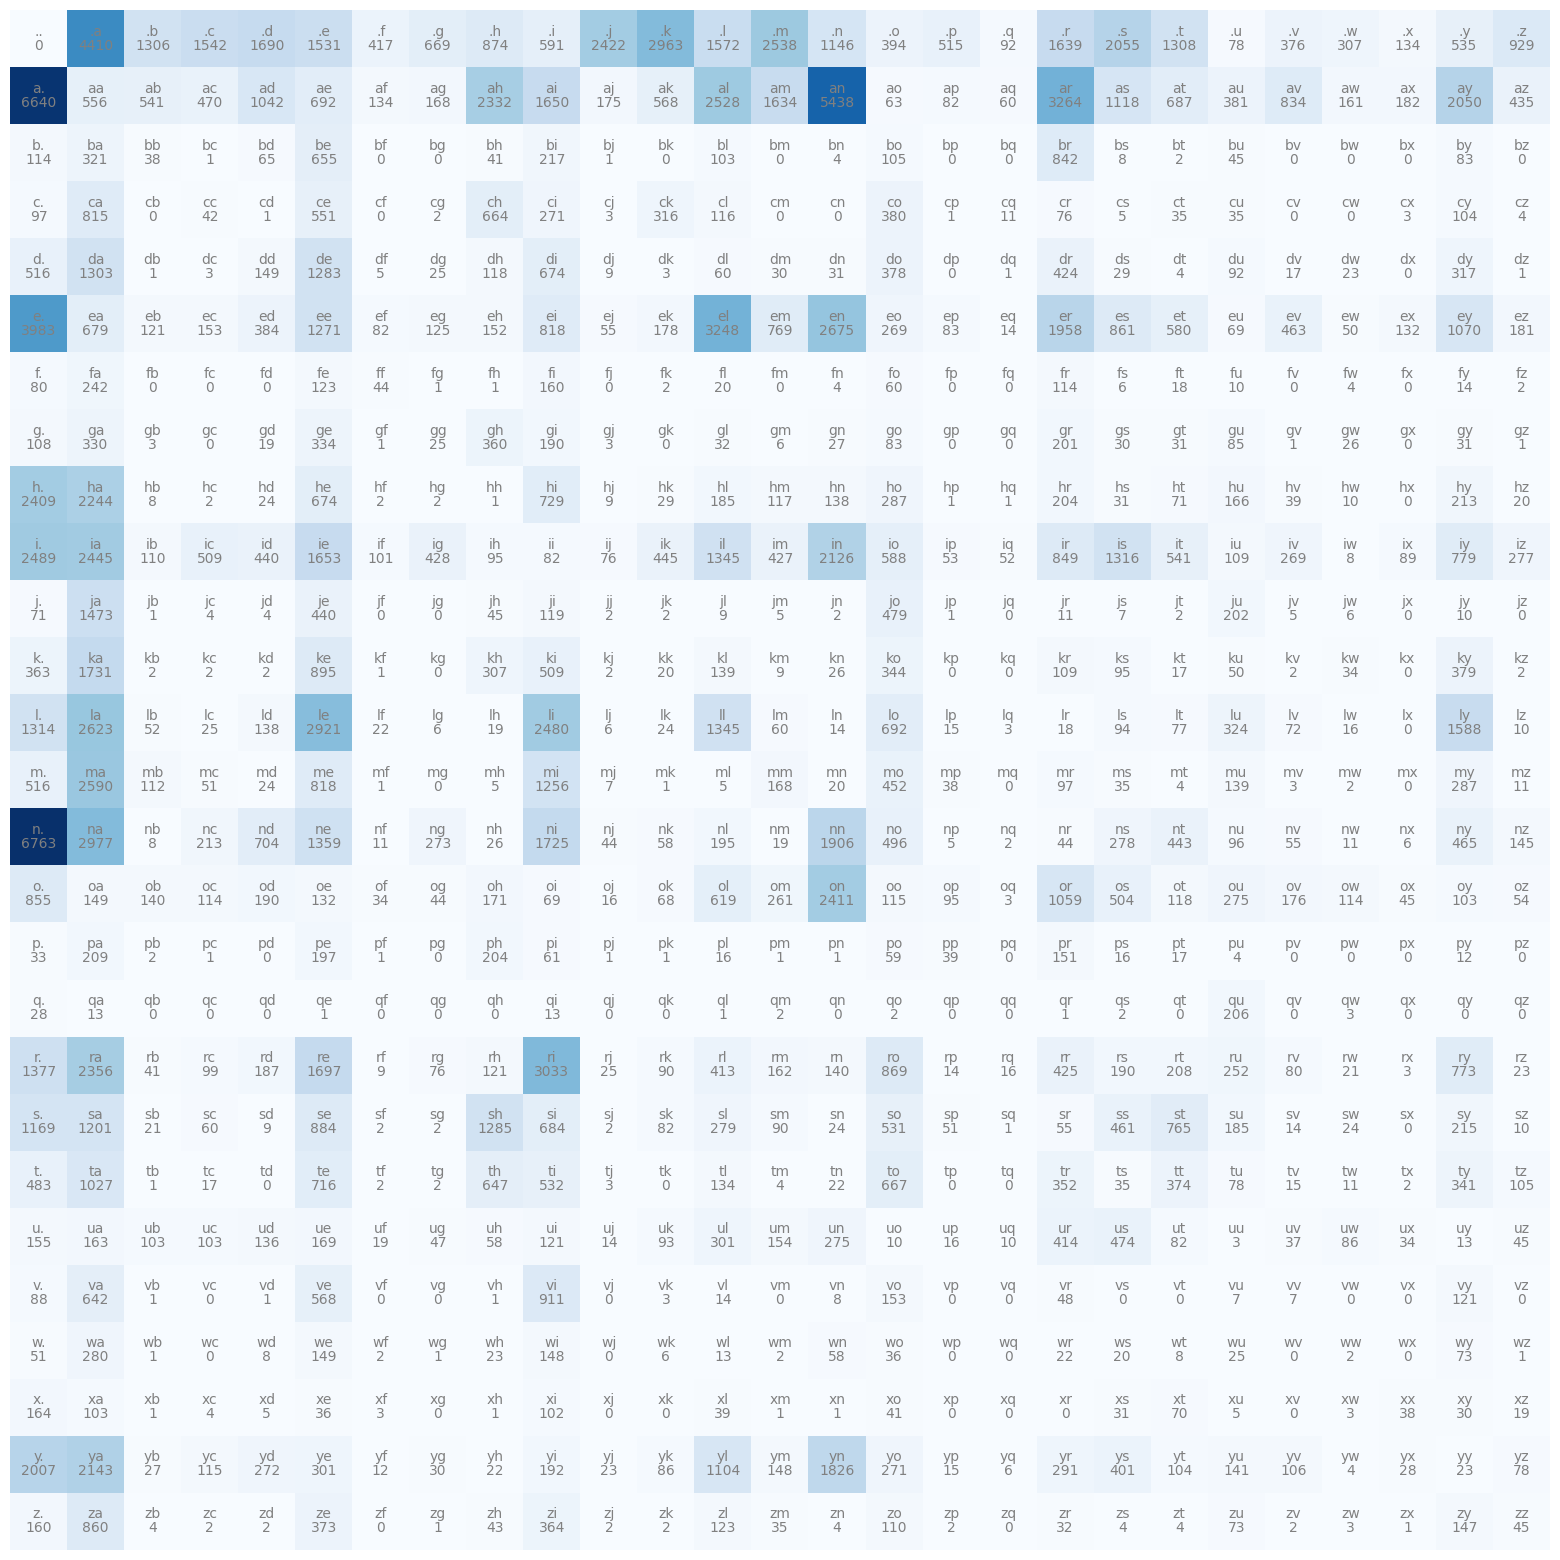

In [34]:
plt.figure(figsize = (20,20))
plt.imshow(N, cmap = 'Blues')
for i in range(27): # now only one special char
  for j in range(27):
    chstr = itos[i] + itos[j]
    plt.text(j, i, chstr, ha = 'center', va = 'bottom', color = 'gray')
    plt.text(j, i, N[i,j].item(), ha = 'center', va = 'top', color = 'gray')
plt.axis('off');


In [35]:
N[0,:] # this tells us the count for what each word begins with.

tensor([   0, 4410, 1306, 1542, 1690, 1531,  417,  669,  874,  591, 2422, 2963,
        1572, 2538, 1146,  394,  515,   92, 1639, 2055, 1308,   78,  376,  307,
         134,  535,  929], dtype=torch.int32)

In [36]:

#example of torch.multinomial
testg= torch.Generator().manual_seed(2147483647)
p = torch.rand(3, generator = testg)
p = p/p.sum()
p

tensor([0.6064, 0.3033, 0.0903])

In [37]:
torch.multinomial(p, num_samples = 20, replacement = True, generator = testg)

tensor([1, 1, 2, 0, 0, 2, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1])

In [38]:
g= torch.Generator().manual_seed(2147483647)
p = N[0].float()
p = p / p.sum() # normalize
p # these are now our propability that any word will begin with a given letter
ix = torch.multinomial(p, num_samples = 1, replacement = True, generator = g).item()
itos[ix]

'j'

In [39]:
#  we'll create a matrix with the probability distributions for the likelihood that
# the next letter is y given x, for each row [meaning for each starting char]
# So we want to sum one by one.
# Note that with keepdim = False it will be preforming a squeeze
P = N.float()




In [40]:
# sum accross the rows then divide each row.
P /= P.sum(1, keepdim = True) # this will normalize every single row

In [41]:
 # 32 minutes
g = torch.Generator().manual_seed(2147483647)
for i in range(5):
  ix = 0
  out = []
  while True:
    p = P[ix]
    ix = torch.multinomial(p, num_samples = 1, replacement = True, generator = g).item()

    out.append(itos[ix])
    if ix == 0:
      break
  print(''.join(out))

junide.
janasah.
p.
cony.
a.


In [42]:
 #likelihood is the product of the probabilities, because of how small the numbers are we use the log likelihood
 # This means we're starting at 0, with more negative numbers being worse preformance.
 # because of the log rules instead of multiplying, we can simply sum the logprobs to get our value.
 log_likelihood = 0
 n=0
 for w in words: # you can put in any name to see its likelihood, per the data set.
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    prob = P[ix1, ix2]
    logprob = torch.log(prob)
    log_likelihood += logprob
    n+=1
    #comment this out if working on alot of data, but for individual names leave it in to see the probs for each bigram!
    # print(f'{ch1}{ch2}: {prob:.4f}{logprob:.4f}')

print(f'{log_likelihood=}')

#with the negative log you now make it so the higher number is worse, and we want the lowest score we can get.
nll = -log_likelihood
print(f'{nll=}')
print(f'{nll/n}') # normalized, the average loglikelihood


# if you put in a bigram that appears 0 times, you'll get inf as the negative log likelihood.
# we can smooth the model by adding P = (N+1).float(), or more if you'd like,
# this will make sure thehre's no zeros
# this may change the direction a bit, but nothing will be "infinitely" unlikely.


log_likelihood=tensor(-559891.7500)
nll=tensor(559891.7500)
2.454094171524048


In [43]:
# lets take a NN approach now
# create the training set of all the bigrams`(x,y)

xs, ys = [], []
for w in words[:1]: # just emma first
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    xs.append(ix1)
    ys.append(ix2)


xs = torch.tensor(xs)
ys = torch.tensor(ys)



In [44]:
xs

tensor([ 0,  5, 13, 13,  1])

In [45]:
ys

tensor([ 5, 13, 13,  1,  0])

In [46]:
# what this means is that when 0 is the input, we want 5 to be the input with high probability
# 0 corresponds to . , 5 corresponds to e, and the first bigram is .e
# next 5 should return 13 with high likelihood, 5 is e, 13 is m. etc.


In [47]:
# one hot encoding makes more sense for our nn, torch has a function that can help

import torch.nn.functional as F
xenc = F.one_hot(xs, num_classes=27).float()
#note that onehot won't let us change the dtype, we have to cast as float otherwise it will return the same dtype
# it inputed, in this case int64

In [48]:
xenc.shape

torch.Size([5, 27])

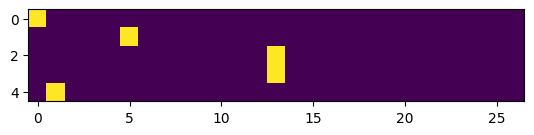

In [49]:
plt.imshow(xenc) #see our encoded ints here

In [50]:

xenc.dtype

torch.float32

In [51]:
# rand draws from the normal distribution, most numbers will be around 0

W= torch.randn((27,1))

xenc @ W #matrix mul
# (5, 27) @ (27, 1) ->(5,1)
# this result is our activations for each input

tensor([[ 0.2040],
        [ 1.1195],
        [-1.5983],
        [-1.5983],
        [-0.0796]])

In [52]:
W= torch.randn((27,27)) # now lets have 27 neurons, not just one

xenc @ W #matrix mul
# (5, 27) @ (27, 27) -> (5,27)


tensor([[-0.2697, -0.2943, -0.6466, -1.0586,  1.2911,  0.2087, -0.3565, -0.5959,
          0.4779, -0.6470, -0.5891,  0.1134,  0.7987, -0.3770,  0.0338, -0.0186,
          1.6673, -0.5158, -0.4056,  1.1407,  0.1368, -0.8537,  0.5201, -0.2645,
          2.3602,  0.8747,  0.3203],
        [-1.7782,  1.0665, -0.1490,  0.4724,  1.1588,  1.1794, -0.2952,  0.3181,
         -0.4536, -1.6447, -0.0464,  0.7306, -1.1899,  0.4505,  1.5186,  0.2930,
         -0.3581,  0.4985,  1.2526,  0.9282,  1.8607, -0.2531,  0.5230,  1.2589,
          1.4356,  1.2967,  1.3286],
        [ 0.6062, -0.3574, -0.5520, -0.3057, -1.1742,  0.5412,  0.8050, -1.4854,
         -0.0183, -0.0429, -0.1596, -0.7197, -0.9481, -0.9295, -0.7261,  0.7874,
         -0.0145,  0.0767,  0.1441,  1.4754,  0.7188,  1.7135,  0.2532,  1.5811,
          0.2686, -0.0906, -1.8610],
        [ 0.6062, -0.3574, -0.5520, -0.3057, -1.1742,  0.5412,  0.8050, -1.4854,
         -0.0183, -0.0429, -0.1596, -0.7197, -0.9481, -0.9295, -0.7261,  0.7874

In [53]:
# this (5, 27) matrix essentially catalogs What each neurons firing rate is, per input.
# so if I wanted to know what the firing rate, or activation was for the 13th neuron
# with respect to the 3 input, I would do the following:
(xenc @ W)[3,13] # the third input dot the 13th col of W (the cols of W are the different neurons)




tensor(-0.9295)

In [54]:
(xenc[3]* W[:,13]).sum() # this is the same as the above

tensor(-0.9295)

In [55]:
# what we want is for the W matrix to give us the log counts (regular counts wouldn't make sense, they're ints)
(xenc @ W).exp() #this turns negative numbers into numbers below 1, and the positive numbers will be greater than 1

tensor([[ 0.7636,  0.7450,  0.5238,  0.3469,  3.6369,  1.2321,  0.7001,  0.5511,
          1.6128,  0.5236,  0.5548,  1.1200,  2.2226,  0.6859,  1.0344,  0.9816,
          5.2977,  0.5970,  0.6666,  3.1288,  1.1466,  0.4258,  1.6821,  0.7676,
         10.5935,  2.3981,  1.3775],
        [ 0.1689,  2.9053,  0.8616,  1.6038,  3.1860,  3.2524,  0.7444,  1.3746,
          0.6353,  0.1931,  0.9546,  2.0764,  0.3043,  1.5691,  4.5659,  1.3404,
          0.6990,  1.6462,  3.4995,  2.5301,  6.4285,  0.7764,  1.6871,  3.5214,
          4.2021,  3.6570,  3.7759],
        [ 1.8334,  0.6995,  0.5758,  0.7366,  0.3091,  1.7180,  2.2368,  0.2264,
          0.9819,  0.9580,  0.8525,  0.4869,  0.3875,  0.3947,  0.4838,  2.1977,
          0.9856,  1.0797,  1.1550,  4.3726,  2.0520,  5.5482,  1.2882,  4.8602,
          1.3081,  0.9134,  0.1555],
        [ 1.8334,  0.6995,  0.5758,  0.7366,  0.3091,  1.7180,  2.2368,  0.2264,
          0.9819,  0.9580,  0.8525,  0.4869,  0.3875,  0.3947,  0.4838,  2.1977

In [56]:
logits = xenc @ W #log-counts
counts = logits.exp() # equivalent to N
probs = counts / counts.sum(1, keepdims = True)

# these last two lines are basically softmax`

In [57]:
probs

tensor([[0.0168, 0.0164, 0.0116, 0.0077, 0.0803, 0.0272, 0.0154, 0.0122, 0.0356,
         0.0116, 0.0122, 0.0247, 0.0490, 0.0151, 0.0228, 0.0217, 0.1169, 0.0132,
         0.0147, 0.0690, 0.0253, 0.0094, 0.0371, 0.0169, 0.2338, 0.0529, 0.0304],
        [0.0029, 0.0500, 0.0148, 0.0276, 0.0548, 0.0559, 0.0128, 0.0236, 0.0109,
         0.0033, 0.0164, 0.0357, 0.0052, 0.0270, 0.0785, 0.0230, 0.0120, 0.0283,
         0.0602, 0.0435, 0.1105, 0.0133, 0.0290, 0.0605, 0.0723, 0.0629, 0.0649],
        [0.0473, 0.0180, 0.0148, 0.0190, 0.0080, 0.0443, 0.0577, 0.0058, 0.0253,
         0.0247, 0.0220, 0.0126, 0.0100, 0.0102, 0.0125, 0.0566, 0.0254, 0.0278,
         0.0298, 0.1127, 0.0529, 0.1430, 0.0332, 0.1253, 0.0337, 0.0235, 0.0040],
        [0.0473, 0.0180, 0.0148, 0.0190, 0.0080, 0.0443, 0.0577, 0.0058, 0.0253,
         0.0247, 0.0220, 0.0126, 0.0100, 0.0102, 0.0125, 0.0566, 0.0254, 0.0278,
         0.0298, 0.1127, 0.0529, 0.1430, 0.0332, 0.1253, 0.0337, 0.0235, 0.0040],
        [0.0472, 0.0042,

In [58]:
probs[0].sum() # we normalized

tensor(1.)

In [59]:
probs[0] # we interpret these 27 outputs as the likelihood that each of the 27 characters comes
#next in the bigram.

tensor([0.0168, 0.0164, 0.0116, 0.0077, 0.0803, 0.0272, 0.0154, 0.0122, 0.0356,
        0.0116, 0.0122, 0.0247, 0.0490, 0.0151, 0.0228, 0.0217, 0.1169, 0.0132,
        0.0147, 0.0690, 0.0253, 0.0094, 0.0371, 0.0169, 0.2338, 0.0529, 0.0304])

In [60]:
nlls = torch.zeros(5)
for i in range(5):
  # i-th bigram:
  x = xs[i].item() # input character index
  y = ys[i].item() # label character index
  print('--------')
  print(f'bigram example {i+1}: {itos[x]}{itos[y]} (indexes {x},{y})')
  print('input to the neural net:', x)
  print('output probabilities from the neural net:', probs[i])
  print('label (actual next character):', y)
  p = probs[i, y]
  print('probability assigned by the net to the the correct character:', p.item())
  logp = torch.log(p)
  print('log likelihood:', logp.item())
  nll = -logp
  print('negative log likelihood:', nll.item())
  nlls[i] = nll

print('=========')
print('average negative log likelihood, i.e. loss =', nlls.mean().item())


--------
bigram example 1: .e (indexes 0,5)
input to the neural net: 0
output probabilities from the neural net: tensor([0.0168, 0.0164, 0.0116, 0.0077, 0.0803, 0.0272, 0.0154, 0.0122, 0.0356,
        0.0116, 0.0122, 0.0247, 0.0490, 0.0151, 0.0228, 0.0217, 0.1169, 0.0132,
        0.0147, 0.0690, 0.0253, 0.0094, 0.0371, 0.0169, 0.2338, 0.0529, 0.0304])
label (actual next character): 5
probability assigned by the net to the the correct character: 0.02718794159591198
log likelihood: -3.6049816608428955
negative log likelihood: 3.6049816608428955
--------
bigram example 2: em (indexes 5,13)
input to the neural net: 5
output probabilities from the neural net: tensor([0.0029, 0.0500, 0.0148, 0.0276, 0.0548, 0.0559, 0.0128, 0.0236, 0.0109,
        0.0033, 0.0164, 0.0357, 0.0052, 0.0270, 0.0785, 0.0230, 0.0120, 0.0283,
        0.0602, 0.0435, 0.1105, 0.0133, 0.0290, 0.0605, 0.0723, 0.0629, 0.0649])
label (actual next character): 13
probability assigned by the net to the the correct character: 

**We're getting consistly low likelihoods that the second letter in the bigram is the correct bigram per the training example. E.g. example 5 is giving a 1.1% of getting the correct answer. *These* W weights are doing terribly, hence our high loss (the average negative log-likelihood)**

In [62]:
# We're getting consistly low likelihoodsThese W weights are doing terribly, hence our high loss (the average negative log-likelihood)

In [70]:
# randomly initialize 27 neurons

g= torch.Generator().manual_seed(2147483647)
W = torch.randn((27,27), generator=g, requires_grad = True) # reguires_grad is False by default!

In [71]:
#forward pass

#remember we have we have 27 possibilities/classses for the next character, counting the special "."
xenc = F.one_hot(xs, num_classes=27).float() # our one-hot encoded input
logits = xenc @ W #log-counts
counts = logits.exp() # equivalent to N
probs = counts / counts.sum(1, keepdims = True) # probs for next charcater
#probs.shape = [5,27]

In [72]:
# lets look at the probabilites we assigned to each of the labels in ys, given xs
probs[0,5], probs[1,13], probs[2,13], probs[3,1], probs[4,0]


(tensor(0.0123, grad_fn=<SelectBackward0>),
 tensor(0.0181, grad_fn=<SelectBackward0>),
 tensor(0.0267, grad_fn=<SelectBackward0>),
 tensor(0.0737, grad_fn=<SelectBackward0>),
 tensor(0.0150, grad_fn=<SelectBackward0>))

In [73]:
# again, we confirm that we're doing terribly
# hear's a neater way to do the above

loss = - probs[torch.arange(5),ys].log().mean() # we took the mean here to get the loss
loss

tensor(3.7693, grad_fn=<NegBackward0>)

In [74]:
#backward pass
W.grad = None # this sets the gradient to zero
loss.backward() # Make sure you've made requires_grad True!

In [ ]:
W.grad  # here are the grads pytorch tracked for us!


In [79]:
# the shape is the same as our W matrix
W.grad.shape

torch.Size([27, 27])

In [80]:
W.data += -0.1 * W.grad # update the weights based on our gradients!
#note we scale by some value alpha



**We've completed a training step, let's see if how our networks improved its predictions. We'll run the forward pass again and see what our loss is now**

In [81]:
#Run the forward pass again!

xenc = F.one_hot(xs, num_classes=27).float()
logits = xenc @ W #log-counts
counts = logits.exp() # equivalent to N
probs = counts / counts.sum(1, keepdims = True) # probs for next charcater
loss = - probs[torch.arange(5),ys].log().mean()
loss

tensor(3.7492, grad_fn=<NegBackward0>)

**our loss has gone from `3.7693` to `3.7492` after training! Our simple NN has learned!**

In [87]:
# Now lets bring in all the words, and every bigram
xs, ys = [], []
for w in words: # before we were just doing emma, here's the whole thing
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    xs.append(ix1)
    ys.append(ix2)


xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement()
print(f'number of examples: {num}')

number of examples: 228146


In [88]:
#our training code complied into the forward and backward step, and update
# this code doesn't have to change at all

for k in range(100): # set the iterations you want here

  #forward pass
  xenc = F.one_hot(xs, num_classes=27).float()
  logits = xenc @ W #log-counts
  counts = logits.exp() # equivalent to N
  probs = counts / counts.sum(1, keepdims = True) # probs for next charcater
  loss = - probs[torch.arange(num),ys].log().mean() # we've changed 5 to num here, remember this is all the data now
  print(f'the loss is: {loss.item()}')

  #backward pass
  W.grad = None # this sets the gradient to zero
  loss.backward() # Make sure you've made requires_grad True!

  #update the network
  W.data += -50 * W.grad #lets get a bigger alpha







the loss is: 3.663215160369873
the loss is: 3.3165295124053955
the loss is: 3.121276617050171
the loss is: 2.9981601238250732
the loss is: 2.9116909503936768
the loss is: 2.8484649658203125
the loss is: 2.800492286682129
the loss is: 2.762702226638794
the loss is: 2.731973171234131
the loss is: 2.7063584327697754
the loss is: 2.684605836868286
the loss is: 2.665881395339966
the loss is: 2.649606704711914
the loss is: 2.6353578567504883
the loss is: 2.6228089332580566
the loss is: 2.611701726913452
the loss is: 2.6018223762512207
the loss is: 2.59299373626709
the loss is: 2.585066318511963
the loss is: 2.577916383743286
the loss is: 2.5714385509490967
the loss is: 2.565544843673706
the loss is: 2.5601608753204346
the loss is: 2.555223226547241
the loss is: 2.5506789684295654
the loss is: 2.546482801437378
the loss is: 2.5425963401794434
the loss is: 2.5389864444732666
the loss is: 2.5356264114379883
the loss is: 2.5324912071228027
the loss is: 2.529560089111328
the loss is: 2.5268146991

**We've achieved very similar results as with our previous counting method! The difference is that these NN can be easily complexified. With our previous method, it works okay for this simple task, but will QUICKLY become unusuable. This issue of *`scalability`* is the crucial difference. The NN approach will be much more flexible, meaning it will be scalable**

**Note that by the time we finished training our matrix W is basically the counts matrix we had before. The difference is, is that you have to exp() the values to get to the counts.**

Note: We could add the following term to the `loss` in the forward pass code above: `+1*(W**2).mean()`. This could would have the effect of creating an almost "downward" pressure on the values of W, making them closer to uniform. This process of 'regularization' is the equiviliant of when we added +1 (or more) to the N matrix in our first bigram model.